**Name** : Omkar Awari

A4 batch

**PRn** 202101070094

**Problem Statement :** to perform feature engineering and EDA on the given Dataset for Supermarket dataset.


## **1.Drive Mount**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## **2.Importing Dataset**

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100

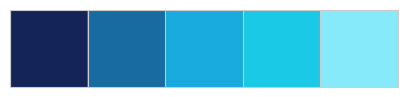

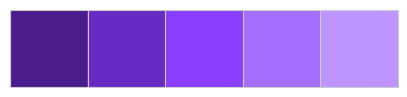

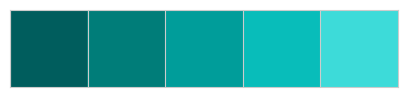

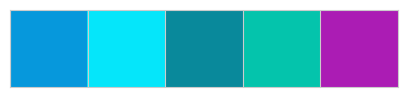

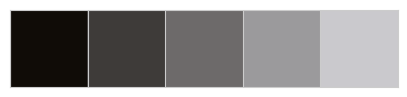

In [ ]:

cyan_grad = ['#142459', '#176BA0', '#19AADE', '#1AC9E6', '#87EAFA']
purple_grad = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF', '#BE95FF']
teal_grad = ['#005D5D', '#007D79', '#009D9A', '#08BDBA', '#3DDBD9']
color_mix = ['#0698DC', '#05E6FA', '#09899B', '#04C4AC', '#AB1CB4']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']


sns.palplot(cyan_grad)
sns.palplot(purple_grad)
sns.palplot(teal_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/DataSets/bigmart.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## **3.Dataset reading**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##**4.Initial Data Exploration**

### **1.Exploring Categorical Variables**

In [ ]:
df.Item_Identifier.value_counts(dropna=False)

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

 Item Fat Content Total


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

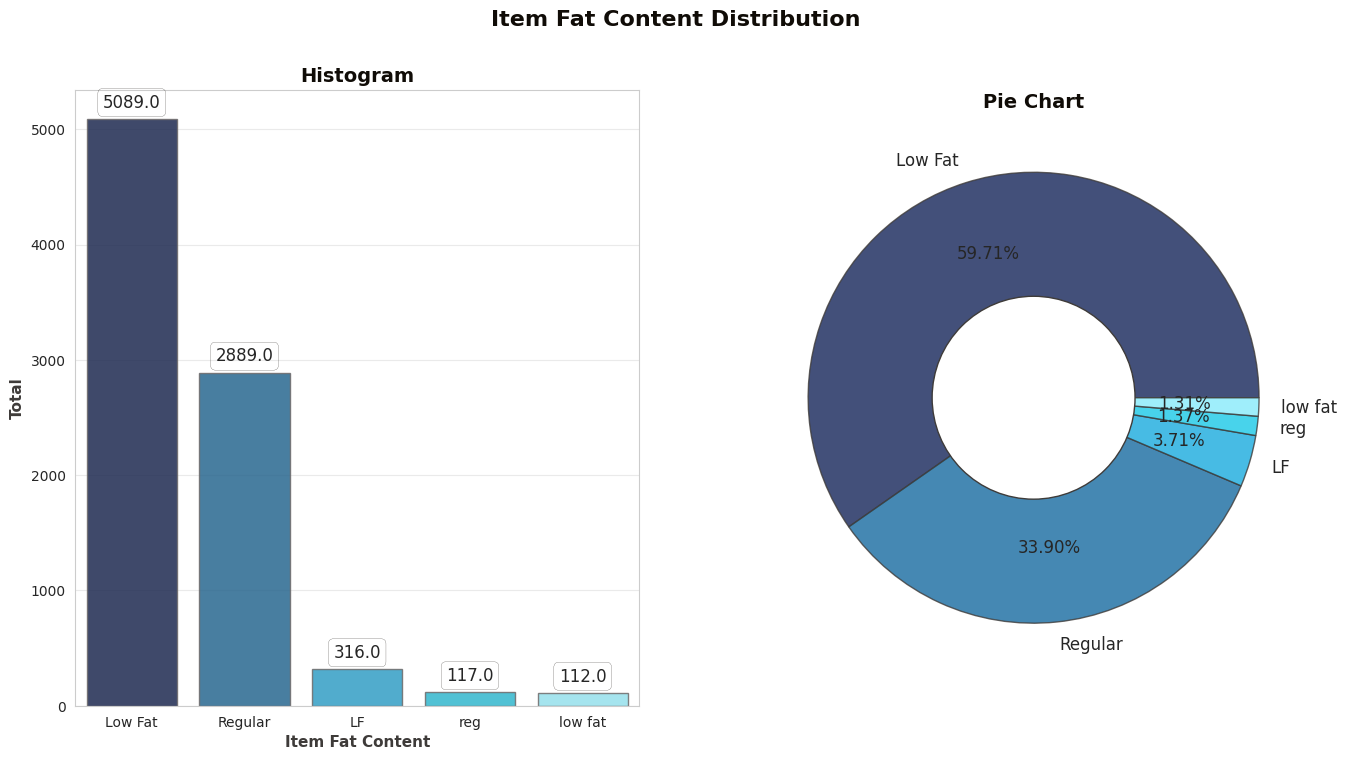

In [ ]:
# Setting Colors, Labels, Order
colors=cyan_grad
labels=df['Item_Fat_Content'].dropna().unique()
order=df['Item_Fat_Content'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Item Fat Content Distribution', fontweight='heavy', fontsize='16', fontfamily='sans-serif',
             color=black_grad[0])

# Histogram
countplt = plt.subplot(1, 2, 1)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='Item_Fat_Content', data=df, palette=colors, order=order, edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+100,rect.get_height(), horizontalalignment='center',
             fontsize=12, bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.15, boxstyle='round'))

plt.xlabel('Item Fat Content', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# Pie Chart
plt.subplot(1, 2, 2)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['Item_Fat_Content'].value_counts(), colors=colors, labels=order, pctdistance=0.67, autopct='%.2f%%',
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# Count Categorical Labels w/out Dropping Null Walues

print(' Item Fat Content Total' )

df.Item_Fat_Content.value_counts(dropna=False)

In [ ]:
# Setting Colors, Labels, Order
colors=teal_grad
labels=df['Item_Type'].dropna().unique()
order=df['Item_Type'].value_counts().index

# Count Categorical Labels w/out Dropping Null Walues

df.Item_Type.value_counts(dropna=False)

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

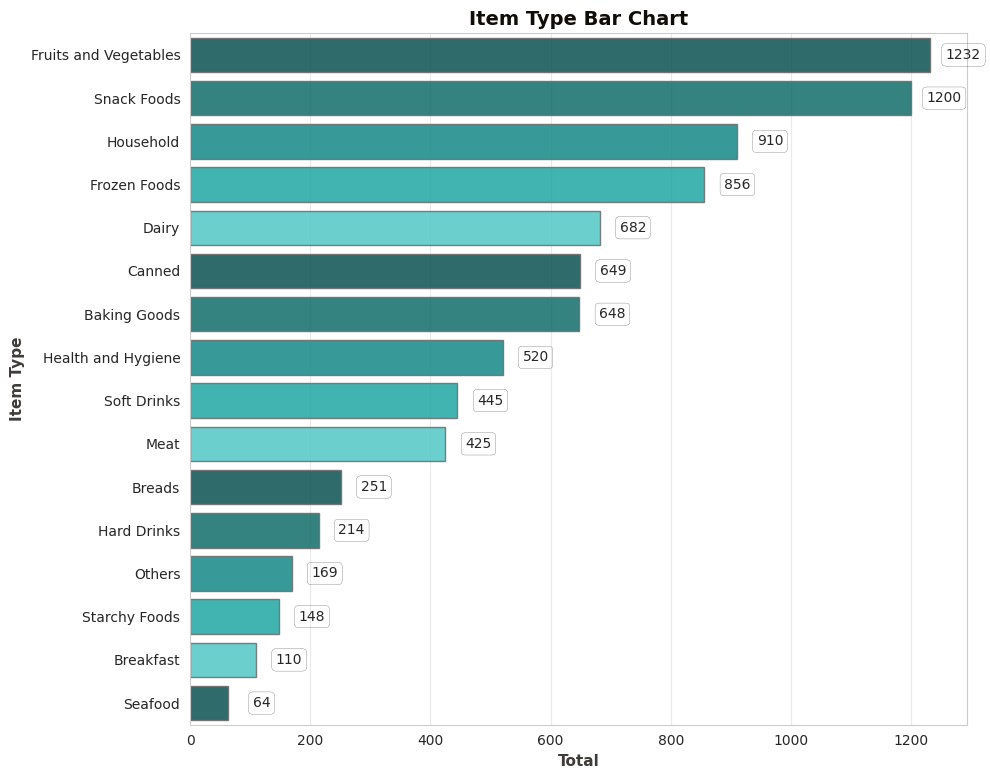

In [ ]:
# Histogram
plt.figure(figsize=(10, 8))
ax = sns.countplot(y='Item_Type', data=df, palette=colors, order=order, edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width+55, y+height/2, '{:.0f}'.format(width), horizontalalignment='center', verticalalignment='center',
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.15, boxstyle='round'))
plt.title('Item Type Bar Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Item Type', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='x', alpha=0.4);

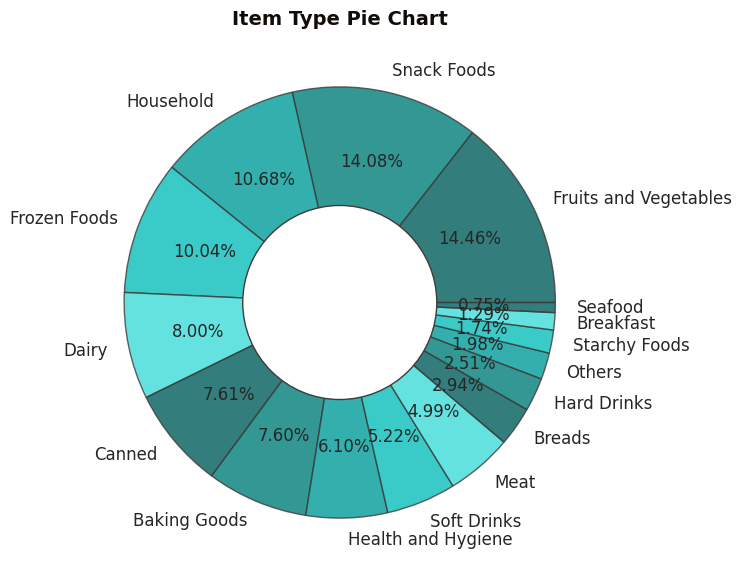

In [ ]:
#  Pie Chart
plt.figure(figsize=(9, 7))
plt.title('Item Type Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['Item_Type'].value_counts(), labels=order, colors=colors, pctdistance=0.67, autopct='%.2f%%',
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre);

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

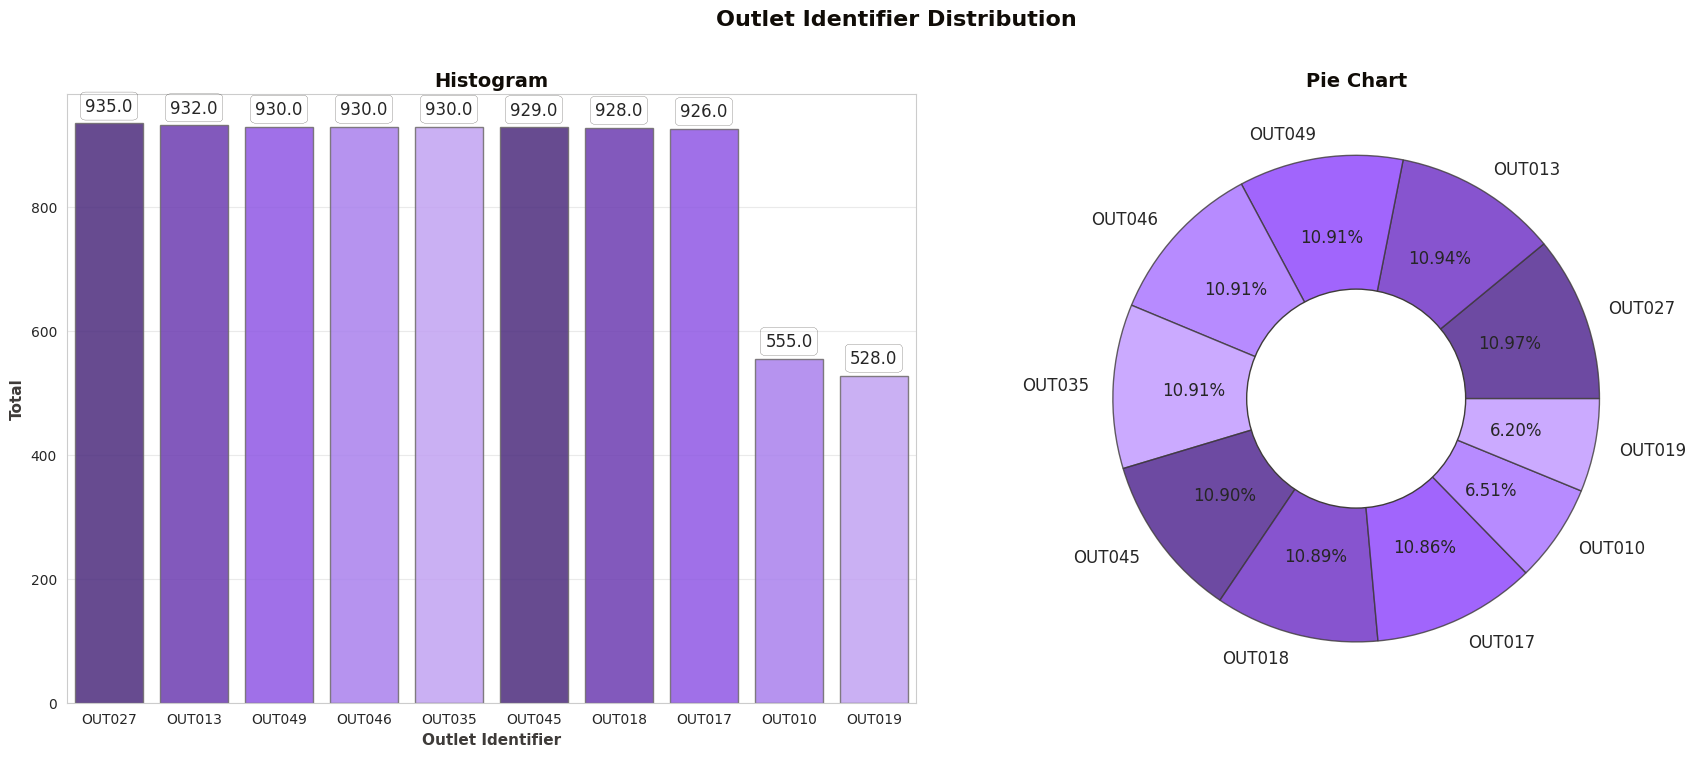

In [ ]:
# Setting Colors, Labels, Order
colors=purple_grad
labels=df['Outlet_Identifier'].dropna().unique()
order=df['Outlet_Identifier'].value_counts().index

#  Size for Both Figures
plt.figure(figsize=(18, 8))
plt.suptitle('Outlet Identifier Distribution', fontweight='heavy', fontsize='16', fontfamily='sans-serif',
             color=black_grad[0])

# Histogram
countplt = plt.subplot(1, 2, 1)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='Outlet_Identifier', data=df, palette=colors, order=order, edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+20,rect.get_height(), horizontalalignment='center',
             fontsize=12, bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.15, boxstyle='round'))
plt.tight_layout(rect=[0, 0.04, 1, 0.965])
plt.xlabel('Outlet Identifier', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# Pie Chart
plt.subplot(1, 2, 2)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['Outlet_Identifier'].value_counts(), colors=colors, labels=order, pctdistance=0.67, autopct='%.2f%%',
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre);

#  Count Categorical Labels w/out Dropping Null Walues -

df.Outlet_Identifier.value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

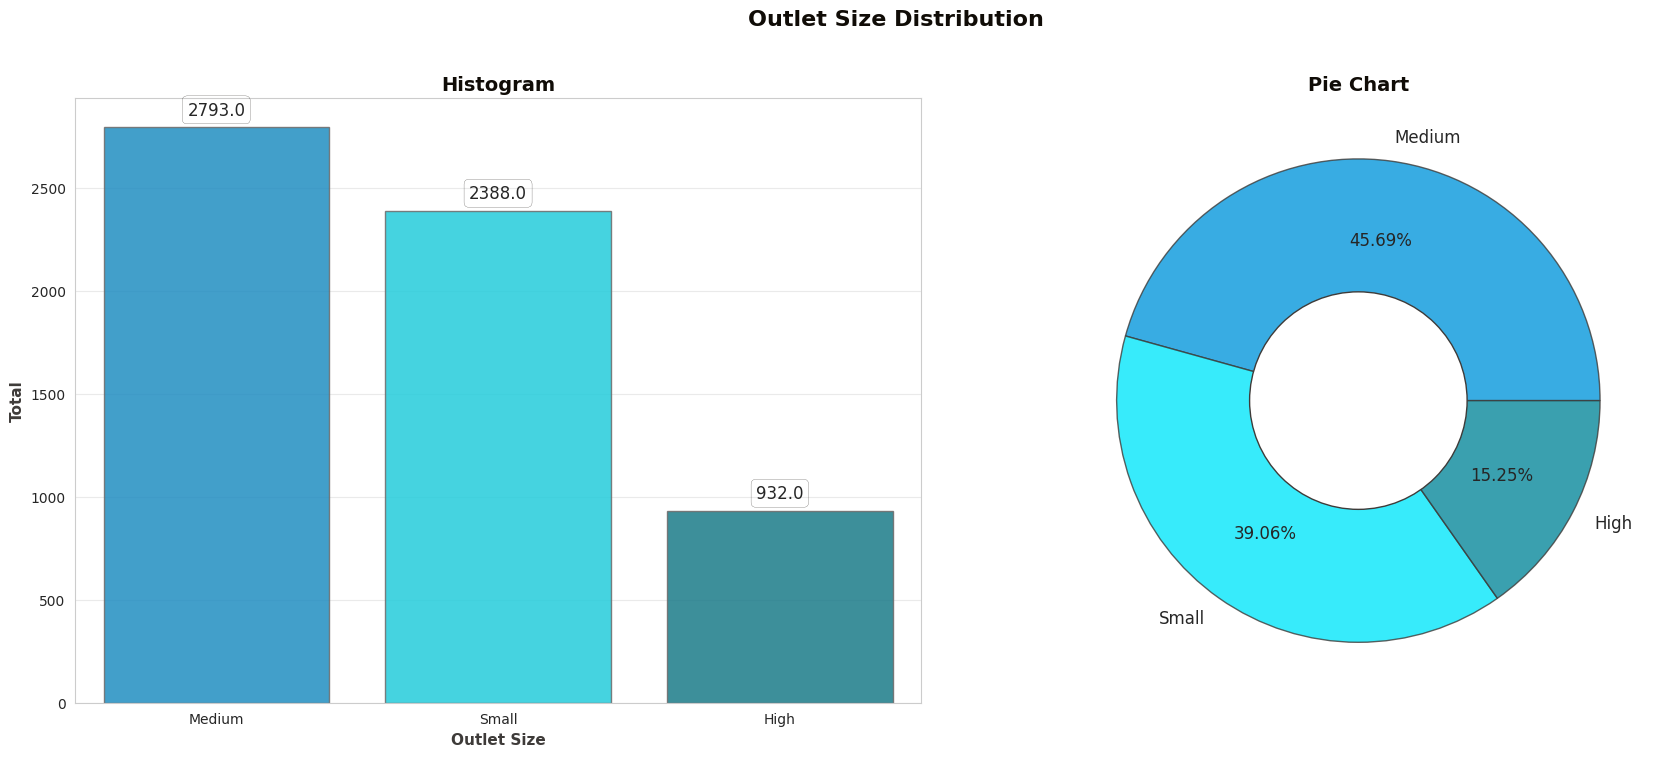

In [ ]:
# Setting Colors, Labels, Order
colors=color_mix
labels=df['Outlet_Size'].dropna().unique()
order=df['Outlet_Size'].value_counts().index

#  Size for Both Figures
plt.figure(figsize=(18, 8))
plt.suptitle('Outlet Size Distribution', fontweight='heavy', fontsize='16', fontfamily='sans-serif', color=black_grad[0])

#  Histogram
countplt = plt.subplot(1, 2, 1)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='Outlet_Size', data=df, palette=colors, order=order, edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+60,rect.get_height(), horizontalalignment='center',
             fontsize=12, bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.15, boxstyle='round'))
plt.tight_layout(rect=[0, 0.04, 1, 0.96])
plt.xlabel('Outlet Size', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

#  Pie Chart
plt.subplot(1, 2, 2)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['Outlet_Size'].value_counts(), colors=colors, labels=order, pctdistance=0.67, autopct='%.2f%%',
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre);

# Count Categorical Labels w/out Dropping Null Walues

df.Outlet_Size.value_counts(dropna=False)

****************************
.: Outlet Location Total :.
****************************


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

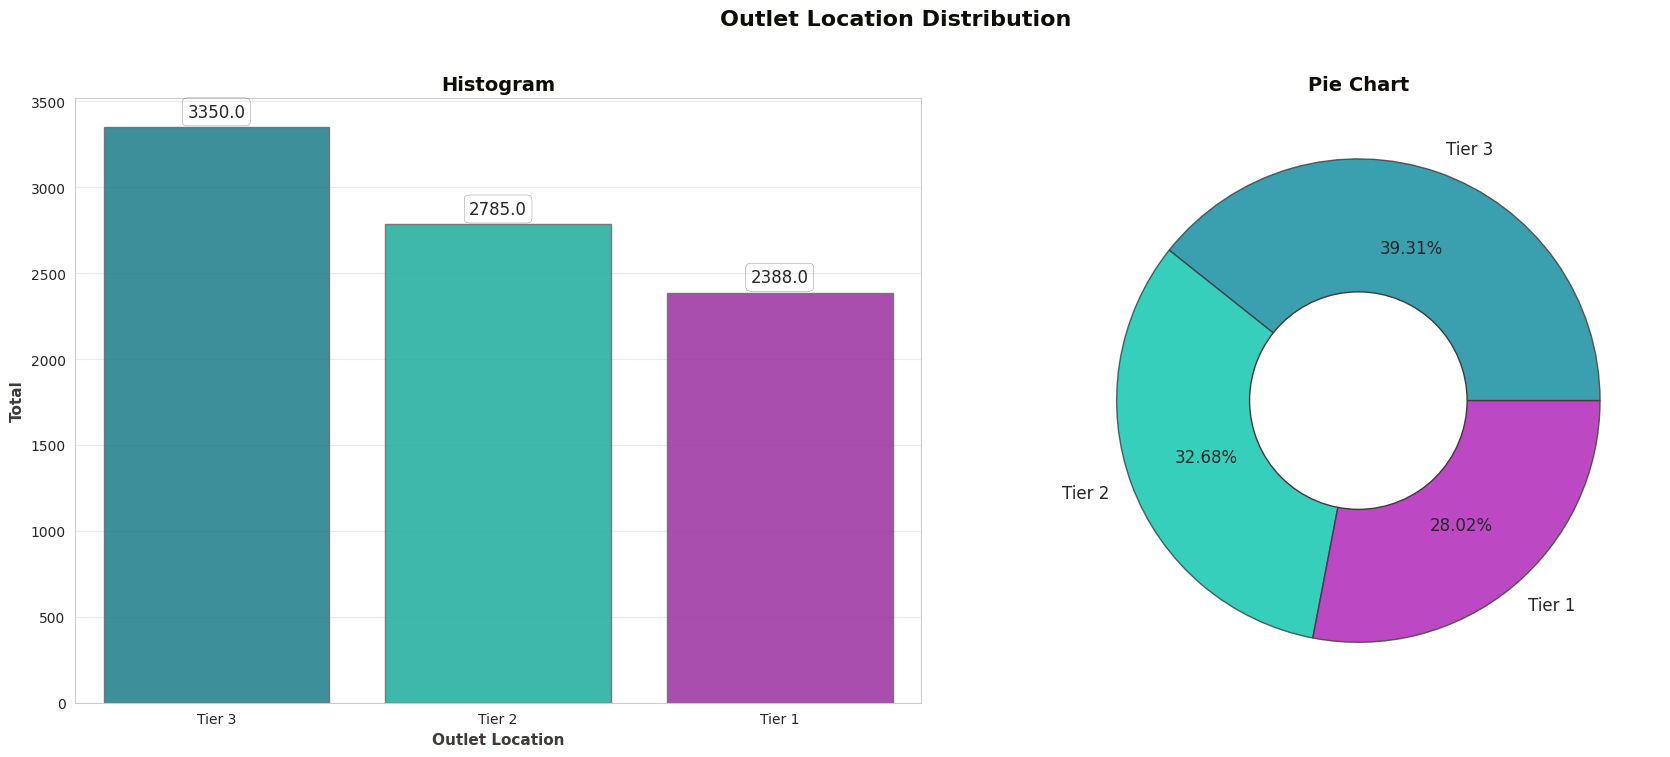

In [ ]:
#  Setting Colors, Labels, Order
colors=color_mix[2:5]
labels=df['Outlet_Location_Type'].dropna().unique()
order=df['Outlet_Location_Type'].value_counts().index

#  Size for Both Figures
plt.figure(figsize=(18, 8))
plt.suptitle('Outlet Location Distribution', fontweight='heavy', fontsize='16', fontfamily='sans-serif',
             color=black_grad[0])

#  Histogram
countplt = plt.subplot(1, 2, 1)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='Outlet_Location_Type', data=df, palette=colors, order=order, edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+60,rect.get_height(), horizontalalignment='center',
             fontsize=12, bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.15, boxstyle='round'))
plt.tight_layout(rect=[0, 0.04, 1, 0.96])
plt.xlabel('Outlet Location', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# Pie Chart
plt.subplot(1, 2, 2)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['Outlet_Location_Type'].value_counts(), colors=colors, labels=order, pctdistance=0.67, autopct='%.2f%%',
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre);

#  Count Categorical Labels w/out Dropping Null Values
print('\033[36m*' * 28)
print('\033[1m'+'.: Outlet Location Total :.'+'\033[0m')
print('\033[36m*' * 28+'\033[0m')
df.Outlet_Location_Type.value_counts(dropna=False)

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

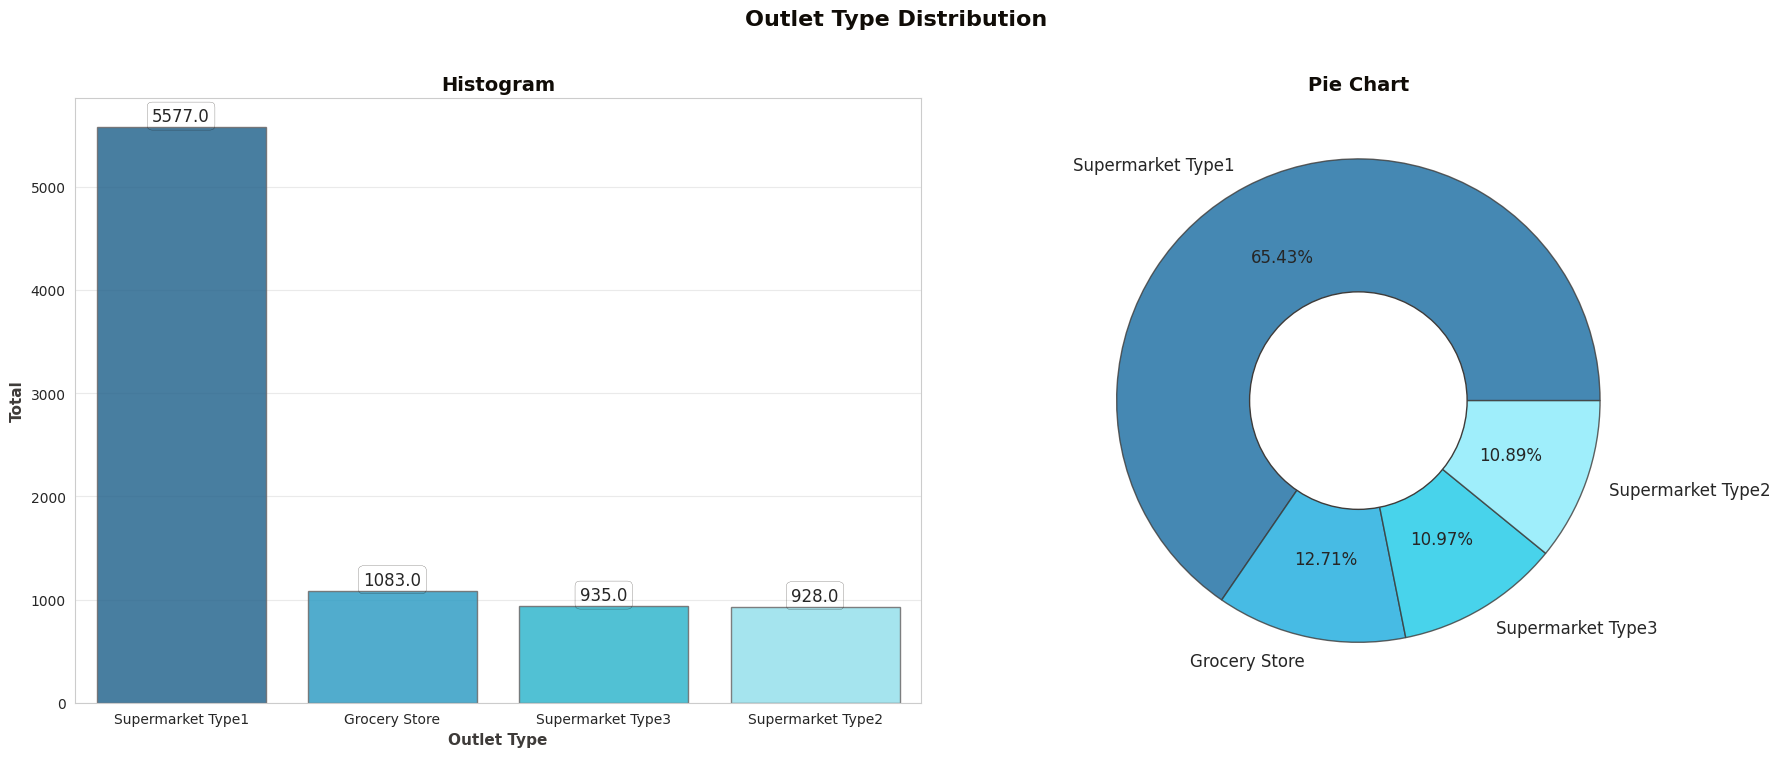

In [ ]:
# Setting Colors, Labels, Order
colors=cyan_grad[1:5]
labels=df['Outlet_Type'].dropna().unique()
order=df['Outlet_Type'].value_counts().index

#  Size for Both Figures
plt.figure(figsize=(18, 8))
plt.suptitle('Outlet Type Distribution', fontweight='heavy', fontsize='16', fontfamily='sans-serif', color=black_grad[0])

#  Histogram
countplt = plt.subplot(1, 2, 1)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='Outlet_Type', data=df, palette=colors, order=order, edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+60,rect.get_height(), horizontalalignment='center',
             fontsize=12, bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.15, boxstyle='round'))
plt.tight_layout(rect=[0, 0.04, 1, 0.96])
plt.xlabel('Outlet Type', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

#  Pie Chart
plt.subplot(1, 2, 2)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['Outlet_Type'].value_counts(), colors=colors, labels=order, pctdistance=0.67, autopct='%.2f%%',
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre);

# Count Categorical Labels w/out Dropping Null values

df.Outlet_Type.value_counts(dropna=False)

### **2.Exploring Numerical Variables**

In [ ]:

df.select_dtypes(exclude='object').describe().T.style.background_gradient(cmap='GnBu').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.000000,12.857645,4.643456,4.555000,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.000000,0.066132,0.051598,0.000000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.000000,140.992782,62.275067,31.290000,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.000000,1997.831867,8.371760,1985.000000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.000000,2181.288914,1706.499616,33.290000,834.247400,1794.331000,3101.296400,13086.964800


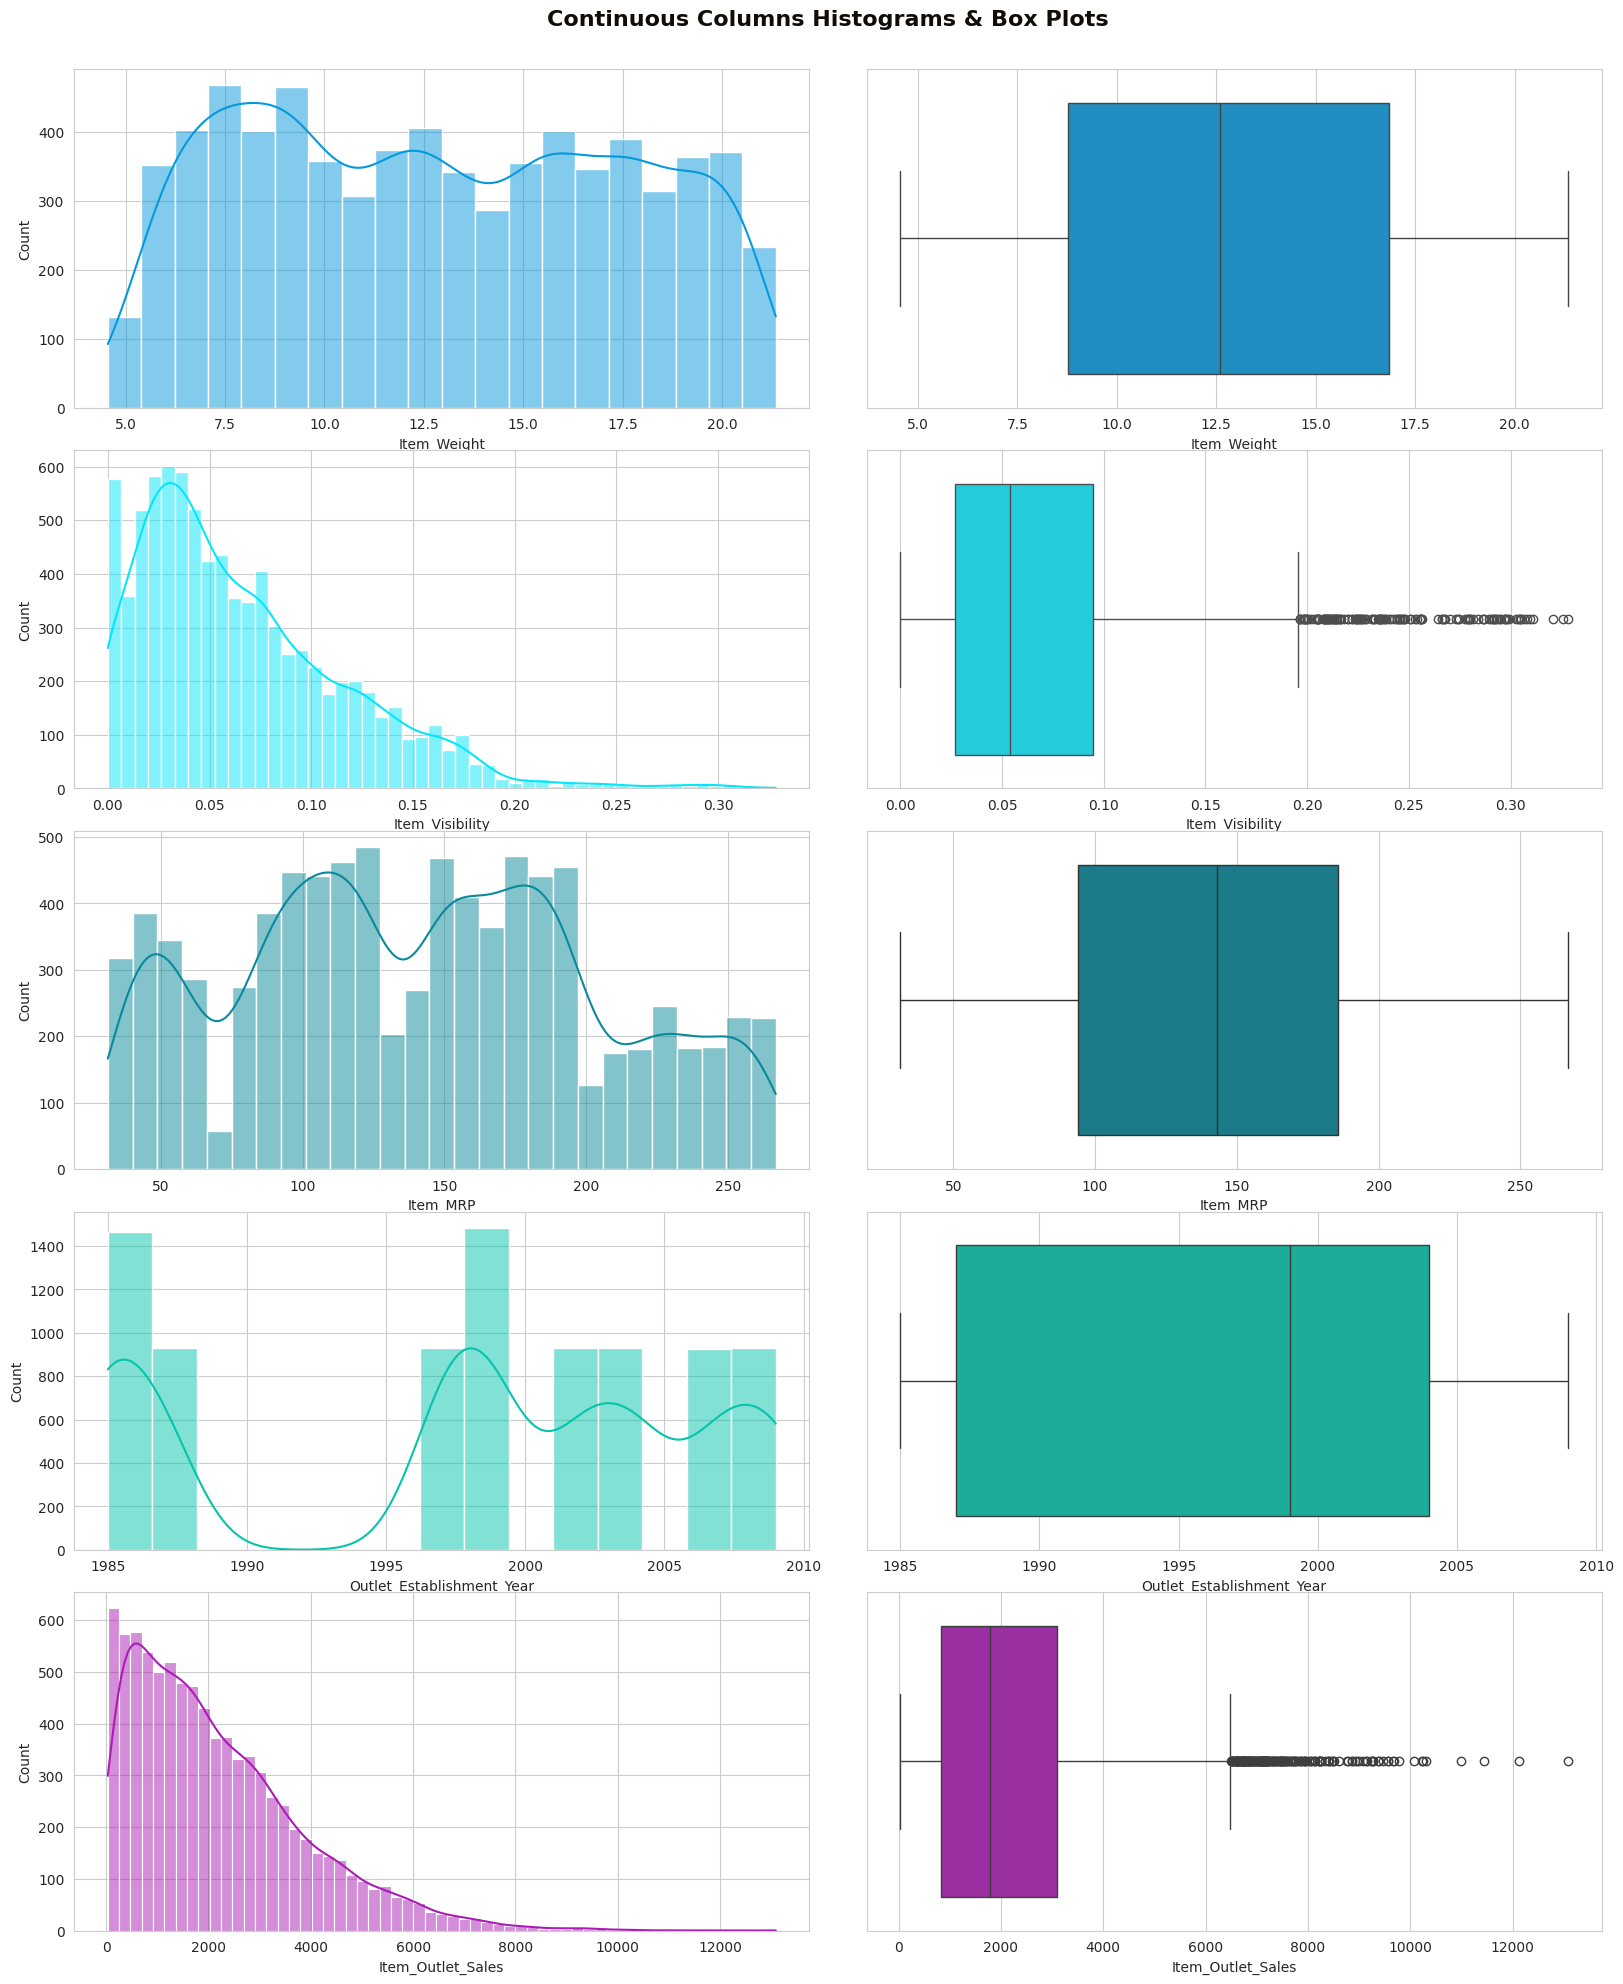

In [ ]:
#  Plot Size
fig, axs = plt.subplots(5, 2, figsize=(16, 20))

#  General Title
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.suptitle('Continuous Columns Histograms & Box Plots', fontweight='bold', fontsize='16', fontfamily='sans-serif',
             color=black_grad[0])

#  Histogram of Continuous Variables (Row 1)
sns.histplot(data=df, x='Item_Weight', kde=True, ax=axs[0, 0], color=color_mix[0])
sns.boxplot(data=df, x='Item_Weight', ax=axs[0, 1], color=color_mix[0]);

#  Histogram of Continuous Variables (Row 2)
sns.histplot(data=df, x='Item_Visibility', kde=True, ax=axs[1, 0], color=color_mix[1])
sns.boxplot(data=df, x='Item_Visibility', ax=axs[1, 1], color=color_mix[1])

#  Histogram of Continuous Variables (Row 3)
sns.histplot(data=df, x='Item_MRP', kde=True, ax=axs[2, 0], color=color_mix[2])
sns.boxplot(data=df, x='Item_MRP', ax=axs[2, 1], color=color_mix[2])

#  Histogram of Continuous Variables (Row 4)
sns.histplot(data=df, x='Outlet_Establishment_Year', kde=True, ax=axs[3, 0], color=color_mix[3])
sns.boxplot(data=df, x='Outlet_Establishment_Year', ax=axs[3, 1], color=color_mix[3])

#  Histogram of Continuous Variables (Row 5)
sns.histplot(data=df, x='Item_Outlet_Sales', kde=True, ax=axs[4, 0], color=color_mix[4])
sns.boxplot(data=df, x='Item_Outlet_Sales', ax=axs[4, 1], color=color_mix[4]);

In [ ]:
#skewness of cintinous variable
df.select_dtypes(exclude='object').skew(axis = 0, skipna = True)

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [ ]:
# Kurtosis of Continuous Variables

df.select_dtypes(exclude='object').kurt(axis = 0, skipna = True)

Item_Weight                 -1.227766
Item_Visibility              1.679445
Item_MRP                    -0.889769
Outlet_Establishment_Year   -1.205694
Item_Outlet_Sales            1.615877
dtype: float64

### **3.Missing Values**

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

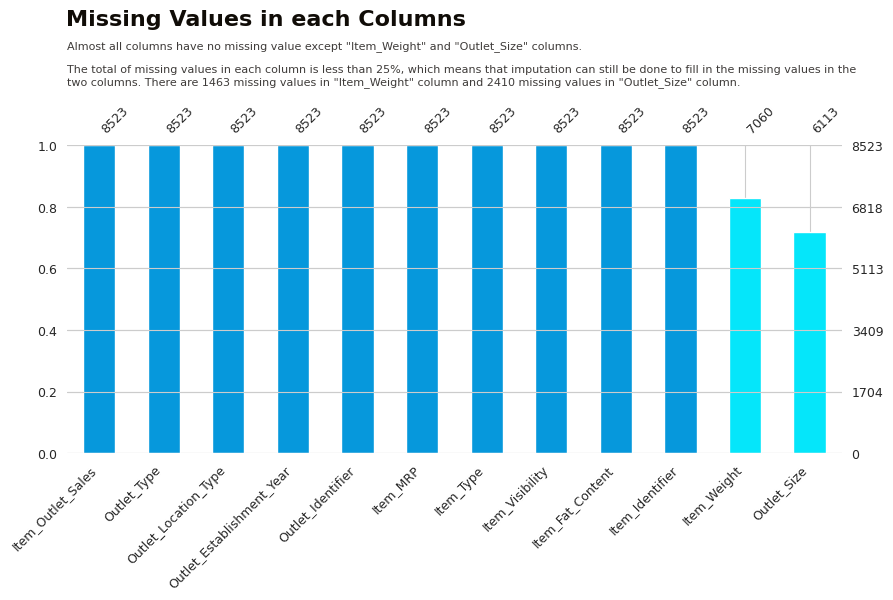

In [ ]:
# Plot Missing Values
mso.bar(df, fontsize=9, color=[color_mix[0], color_mix[0], color_mix[0], color_mix[0], color_mix[0], color_mix[0],
                               color_mix[0], color_mix[0], color_mix[0], color_mix[0], color_mix[1], color_mix[1]],
        figsize=(10, 4), sort='descending', labels=True)

# Title & Subtitle Settings
plt.suptitle('Missing Values in each Columns', fontweight='heavy', x=0.124, y=1.22, ha='left',fontsize='16',
             fontfamily='sans-serif', color=black_grad[0])
plt.title('Almost all columns have no missing value except "Item_Weight" and "Outlet_Size" columns.\n\nThe total of missing values in each column is less than 25%, which means that imputation can still be done to fill in the missing values in the\ntwo columns. There are 1463 missing values in "Item_Weight" column and 2410 missing values in "Outlet_Size" column.\n',
          fontsize='8', fontfamily='sans-serif', loc='left', color=black_grad[1], pad=5)
plt.grid(axis='both', alpha=0);

#  Total Missing Values in each Columns

df.isnull().sum()

## **5.Data Preprocessing**

### **1.Handling Dirty Data**

In [ ]:
# Transform 'Low Fat' Incosistent Values
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')

# Transform 'Regular' Incosistent Values
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

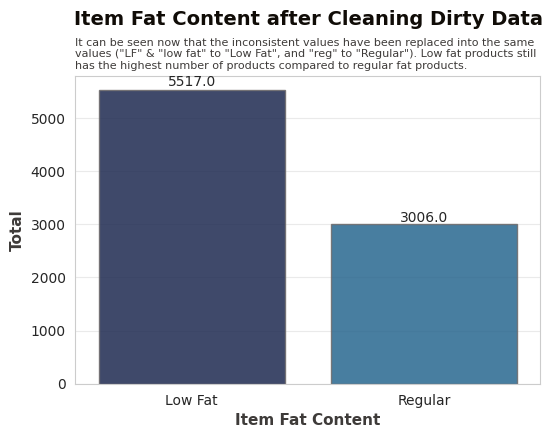

In [ ]:
# Creating Bar Chart
fig, ax = plt.subplots()
ax = sns.countplot(x='Item_Fat_Content', data=df, palette=cyan_grad, edgecolor=black_grad[2], alpha=0.85)

# Bar Chart Settings
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()*1.015,rect.get_height(), horizontalalignment='center',
             fontsize=10)
fig.set_size_inches(6, 4)
plt.suptitle('Item Fat Content after Cleaning Dirty Data', fontweight='heavy', x=0.122, y=1.045, ha='left', fontsize='14',
             fontfamily='sans-serif', color=black_grad[0])
plt.title('It can be seen now that the inconsistent values have been replaced into the same\nvalues ("LF" & "low fat" to "Low Fat", and "reg" to "Regular"). Low fat products still\nhas the highest number of products compared to regular fat products.',
          fontsize='8', fontfamily='sans-serif', loc='left', color=black_grad[1], pad=5)
plt.xlabel('Item Fat Content', fontweight='bold', fontsize='11', fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize='11', fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='x', alpha=0)
plt.grid(axis='y', alpha=0.4);

### **2.Handling Missing Values**

In [ ]:
# Before: Group 'Outlet_Type' and 'Outlet_Size' & Calculate Total Outlets
df.groupby(['Outlet_Type', 'Outlet_Size'], dropna=False)['Item_Identifier'].nunique().reset_index().sort_values(by=['Outlet_Size'], ascending=False).style.background_gradient(cmap='GnBu').set_properties(**{'font-family': 'Segoe UI'})

,Outlet_Type,Outlet_Size,Item_Identifier
0,Grocery Store,Small,528
4,Supermarket Type1,Small,1311
3,Supermarket Type1,Medium,930
6,Supermarket Type2,Medium,928
7,Supermarket Type3,Medium,935
2,Supermarket Type1,High,932
1,Grocery Store,nan,555
5,Supermarket Type1,nan,1305


In [ ]:
df['Outlet_Size'] = df['Outlet_Size'].replace(np.nan, 'Small')

In [ ]:
df.groupby(['Outlet_Type', 'Outlet_Size'], dropna=False)['Item_Identifier'].nunique().reset_index().sort_values(by=['Outlet_Size'], ascending=False).style.background_gradient(cmap='Blues').set_properties(**{'font-family': 'Segoe UI'})

,Outlet_Type,Outlet_Size,Item_Identifier
0,Grocery Store,Small,901
3,Supermarket Type1,Small,1512
2,Supermarket Type1,Medium,930
4,Supermarket Type2,Medium,928
5,Supermarket Type3,Medium,935
1,Supermarket Type1,High,932


In [ ]:
df[['Item_Identifier', 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier']).head(13).style.background_gradient(cmap='PuBu').set_properties(**{'font-family': 'Segoe UI'})

,Item_Identifier,Item_Weight
118,DRA12,11.600000
2879,DRA24,nan
1148,DRA24,19.350000
6057,DRA59,nan
1876,DRA59,8.270000
3733,DRB01,nan
3465,DRB01,7.390000
1431,DRB13,6.115000
2657,DRB24,8.785000
776,DRB25,12.300000


In [ ]:
#last value replacement method
df['Item_Weight']=df.groupby('Item_Identifier')['Item_Weight'].fillna(method='ffill')
df['Item_Weight']=df.groupby('Item_Identifier')['Item_Weight'].fillna(method='bfill')


In [ ]:
df[['Item_Identifier', 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier']).head(13).style.background_gradient(cmap='GnBu').set_properties(**{'font-family': 'Segoe UI'})

,Item_Identifier,Item_Weight
118,DRA12,11.600000
1148,DRA24,19.350000
1876,DRA59,8.270000
3465,DRB01,7.390000
1431,DRB13,6.115000
2657,DRB24,8.785000
776,DRB25,12.300000
103,DRB48,16.750000
1,DRC01,5.920000
772,DRC12,17.850000


In [ ]:
# --- Check Missing Values Left in Dataset ---
ds1 = df[['Item_Identifier', 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])
nan_values = ds1[ds1['Item_Weight'].isna()]
print (nan_values)

     Item_Identifier  Item_Weight
4187           FDE52          NaN
1922           FDK57          NaN
927            FDN52          NaN
5022           FDQ60          NaN


In [ ]:
# using Mean Method
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

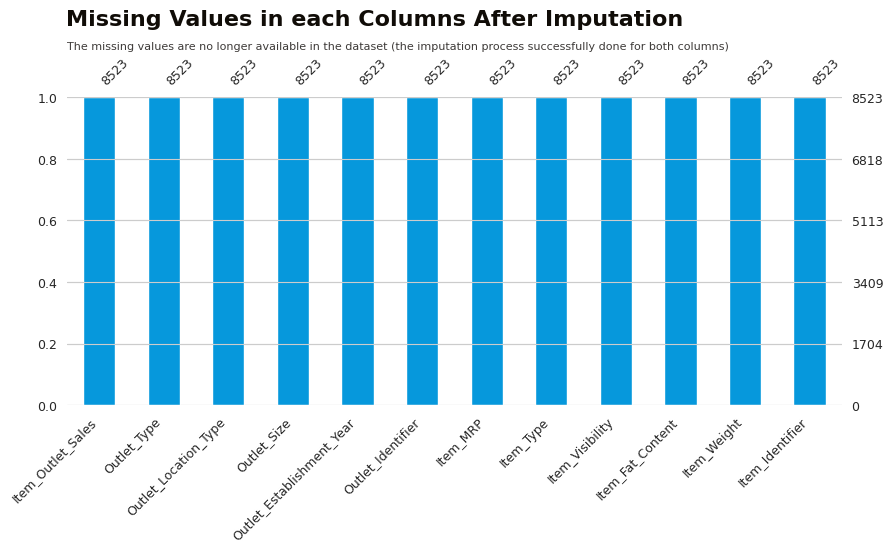

In [ ]:
#  Plot Missing Values
mso.bar(df, fontsize=9, color=[color_mix[0], color_mix[0], color_mix[0], color_mix[0],
                               color_mix[0], color_mix[0], color_mix[0], color_mix[0],
                               color_mix[0], color_mix[0], color_mix[0], color_mix[0]],
              figsize=(10, 4), sort='descending', labels=True)

# --- Title & Subtitle Settings ---
plt.suptitle('Missing Values in each Columns After Imputation', fontweight='heavy', x=0.124, y=1.1, ha='left',
             fontsize='16', fontfamily='sans-serif', color=black_grad[0])
plt.title('The missing values are no longer available in the dataset (the imputation process successfully done for both columns)',
          fontsize='8', fontfamily='sans-serif', loc='left', color=black_grad[1], pad=5)
plt.grid(axis='both', alpha=0);

# Total Missing Values in each Columns After Imputation

df.isnull().sum()

### **3.Handling Outliers**

In [ ]:
#  Creating Copy of Both Columns
ds1 = df[['Item_Visibility', 'Item_Outlet_Sales']].copy()

# Using Log Transformation
ds1['Item_Visibility_log'] = np.log(ds1['Item_Visibility'])
ds1['Item_Outlet_Sales_log'] = np.log(ds1['Item_Outlet_Sales'])

#  Using Square Root Transformation
ds1['Item_Visibility_sqrt'] = np.sqrt(ds1['Item_Visibility'])
ds1['Item_Outlet_Sales_sqrt'] = np.sqrt(ds1['Item_Outlet_Sales'])

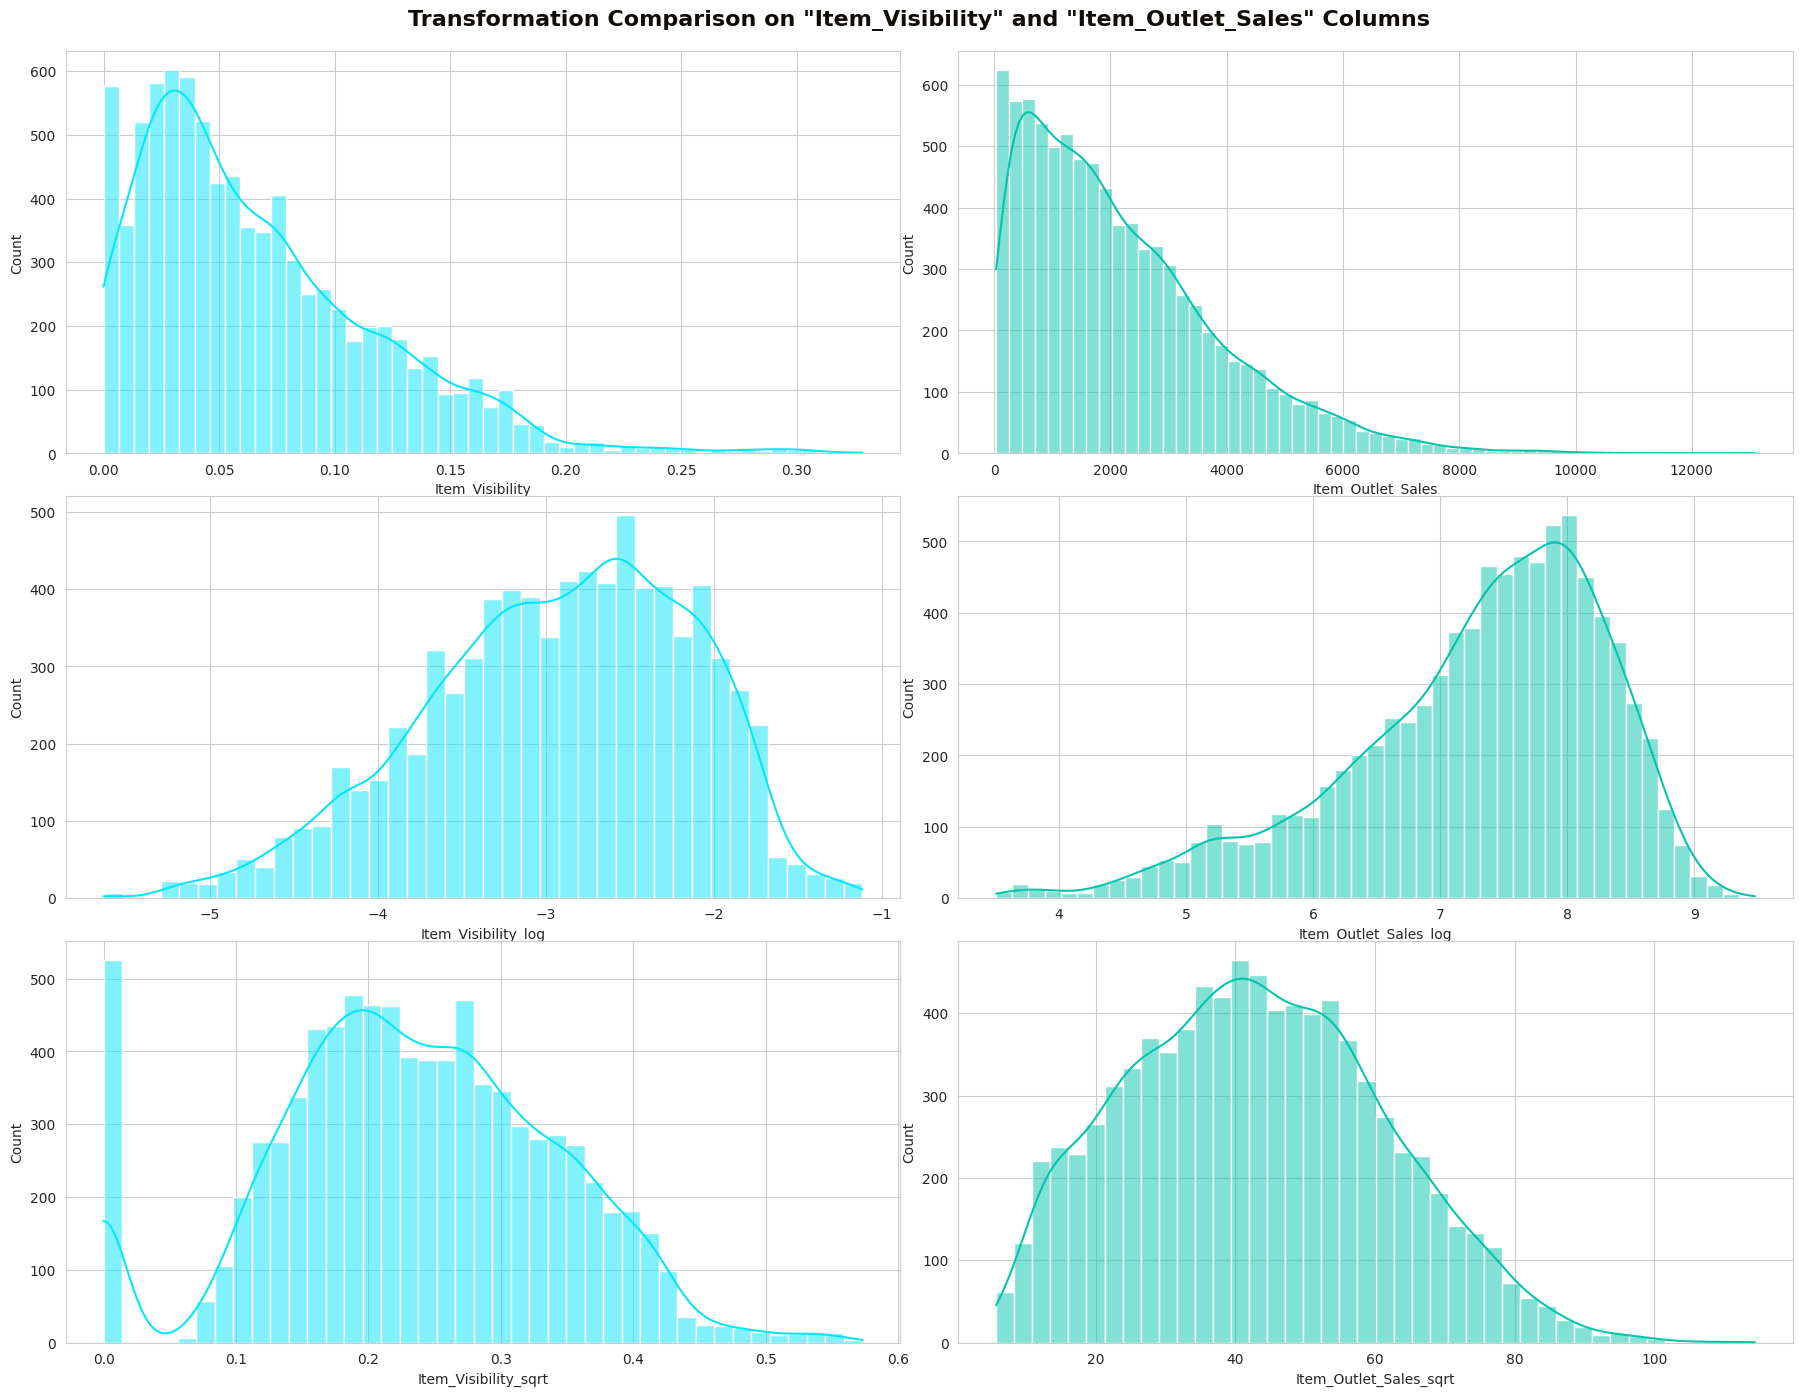

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(18, 14))

#  General Title
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.suptitle('Transformation Comparison on "Item_Visibility" and "Item_Outlet_Sales" Columns',
             fontweight='bold', fontsize='16', fontfamily='sans-serif', color=black_grad[0])

#  Histograms of "Item_Visibility" Transformation (Column 1)
sns.histplot(data=ds1, x='Item_Visibility', kde=True, ax=axs[0, 0], color=color_mix[1])
sns.histplot(data=ds1, x='Item_Visibility_log', kde=True, ax=axs[1, 0], color=color_mix[1])
sns.histplot(data=ds1, x='Item_Visibility_sqrt', kde=True, ax=axs[2, 0], color=color_mix[1])

# Histograms of "Item_Outlet_Sales" Transformation (Column 2)
sns.histplot(data=ds1, x='Item_Outlet_Sales', kde=True, ax=axs[0, 1], color=color_mix[3])
sns.histplot(data=ds1, x='Item_Outlet_Sales_log', kde=True, ax=axs[1, 1], color=color_mix[3])
sns.histplot(data=ds1, x='Item_Outlet_Sales_sqrt', kde=True, ax=axs[2, 1], color=color_mix[3]);

In [ ]:
ds1.skew(axis = 0, skipna = True)

Item_Visibility           1.167091
Item_Outlet_Sales         1.177531
Item_Visibility_log            NaN
Item_Outlet_Sales_log    -0.887753
Item_Visibility_sqrt     -0.098056
Item_Outlet_Sales_sqrt    0.234676
dtype: float64

In [ ]:
#  Apply Square Root Transformation on Real Dataset
df['Item_Visibility_sqrt'] = np.sqrt(df['Item_Visibility'])
df['Item_Outlet_Sales_sqrt'] = np.sqrt(df['Item_Outlet_Sales'])

#  Drop Original Columns
df = df.drop(columns=['Item_Visibility', 'Item_Outlet_Sales'])

## **6.Feature Engineering**

## **Encoding **

In [ ]:
# Creating 'Item_Category' Column
df['Item_Category'] = df['Item_Identifier'].astype(str).str[:2]
df['Item_Category'] = df['Item_Category'].replace(['FD', 'DR', 'NC'],['Food', 'Drink', 'Non-Consumable'])

In [ ]:
df['Age_Outlet'] = 2022-df['Outlet_Establishment_Year']

In [ ]:
bin = [1, 10, 20, 100]
outlet_cat = ['New Outlet', 'Moderate Outlet', 'Old Outlet']
df['Outlet_Category'] = pd.cut(df['Age_Outlet'], bins=bin, labels=outlet_cat)

#binning method that will convert "Age_Outlet" to create "Outlet_Category" column.

In [ ]:
#label encoding
df['Item_Fat_Content_Encoding'] = df['Item_Fat_Content'].replace(['Low Fat', 'Regular'], ['0', '1'])

In [ ]:
# Perform One-Hot Encoding
a = pd.get_dummies(df['Item_Category'], prefix = 'Item_Category')
b = pd.get_dummies(df['Outlet_Category'], prefix = 'Outlet_Category')
c = pd.get_dummies(df['Outlet_Size'], prefix = 'Outlet_Size')
d = pd.get_dummies(df['Outlet_Location_Type'], prefix = 'Outlet_Location_Type')
e = pd.get_dummies(df['Outlet_Type'], prefix = 'Outlet_Type')

#  Concat w/ Main Dataframe
frames = [df, a, b, c, d, e]
ds = pd.concat(frames, axis = 1)

In [ ]:
df = df.drop(columns = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Category',
                        'Outlet_Category', 'Outlet_Establishment_Year'])

In [ ]:
# Show Final Dataset
ds.head().style.background_gradient(cmap='GnBu').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility_sqrt,Item_Outlet_Sales_sqrt,Item_Category,Age_Outlet,Outlet_Category,Item_Fat_Content_Encoding,Item_Category_Drink,Item_Category_Food,Item_Category_Non-Consumable,Outlet_Category_New Outlet,Outlet_Category_Moderate Outlet,Outlet_Category_Old Outlet,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
FDA15,9.300000,Low Fat,Dairy,249.809200,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.126678,61.115775,Food,23,Old Outlet,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0
DRC01,5.920000,Regular,Soft Drinks,48.269200,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.138846,21.057607,Drink,13,Moderate Outlet,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
FDN15,17.500000,Low Fat,Meat,141.618000,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.129461,45.795961,Food,23,Old Outlet,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0
FDX07,19.200000,Regular,Fruits and Vegetables,182.095000,OUT010,1998,Small,Tier 3,Grocery Store,0.000000,27.062520,Food,24,Old Outlet,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0
NCD19,8.930000,Low Fat,Household,53.861400,OUT013,1987,High,Tier 3,Supermarket Type1,0.000000,31.538947,Non-Consumable,35,Old Outlet,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0


## **7.EDA**

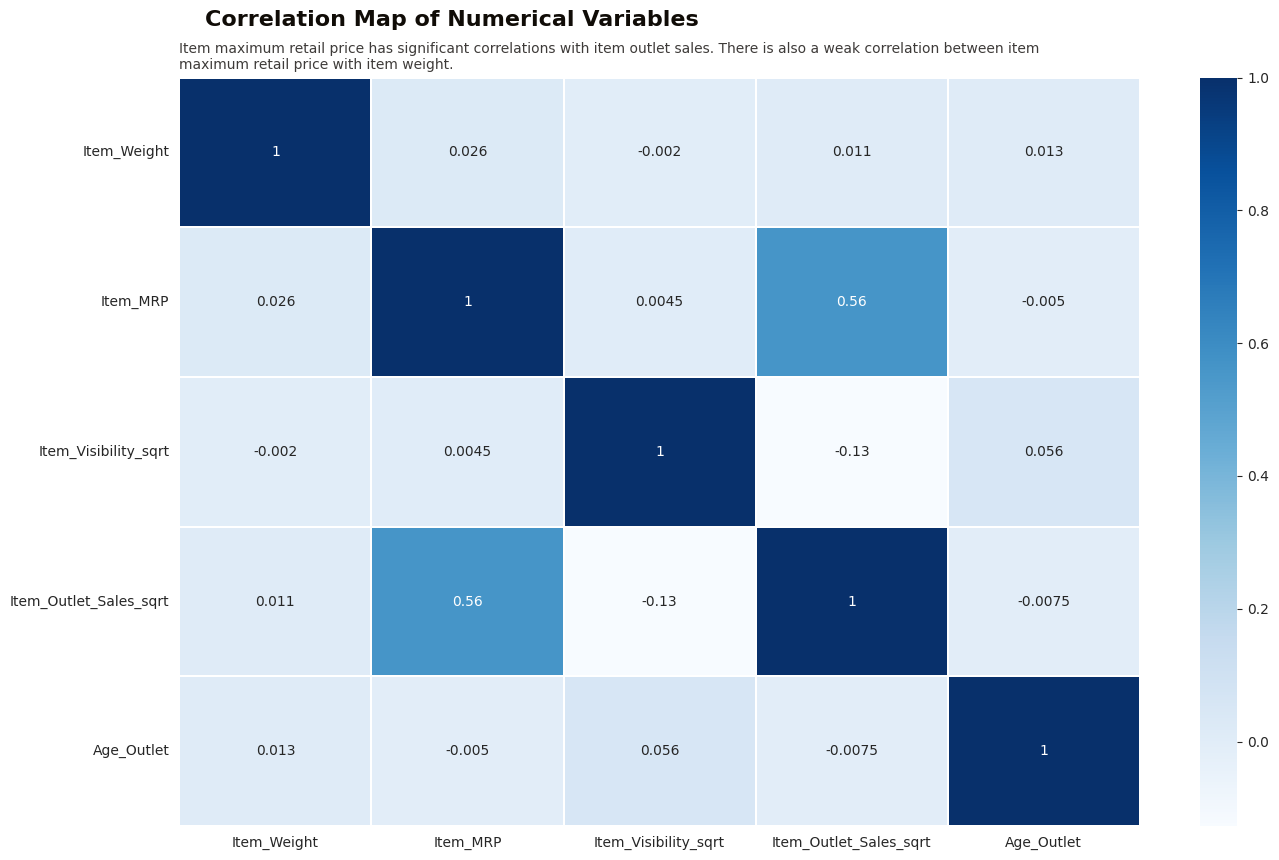

In [ ]:
plt.figure(figsize=(14, 9))
sns.heatmap(df.corr(), annot=True, cmap='Blues', linewidths=0.1)
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', x=0.15, y=0.99, ha='left', fontsize='16',
             fontfamily='sans-serif', color=black_grad[0])
plt.title('Item maximum retail price has significant correlations with item outlet sales. There is also a weak correlation between item\nmaximum retail price with item weight.',
          fontsize='10', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

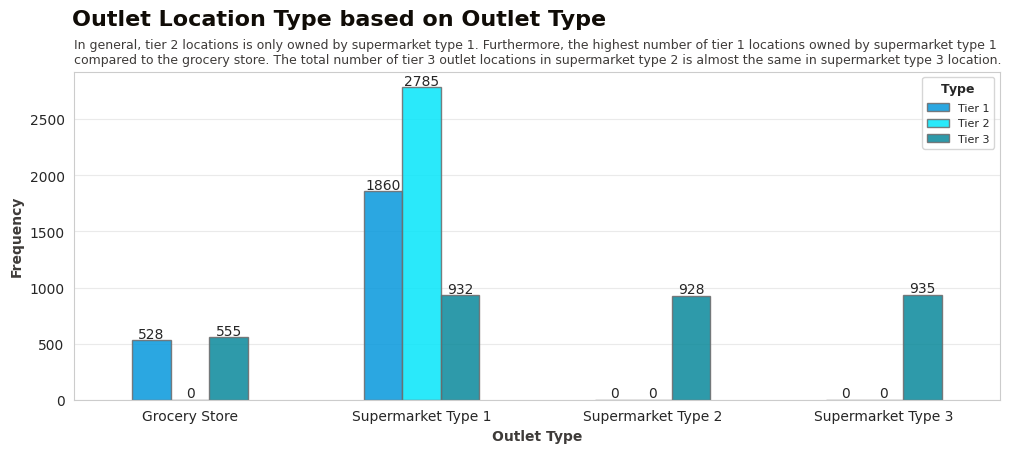

In [ ]:
# --- Labels Settings ---
labels = ['Tier 1', 'Tier 2', 'Tier 3']
label_mart = np.array([0, 1, 2, 3])
label_mart2 = ['Grocery Store', 'Supermarket Type 1', 'Supermarket Type 2', 'Supermarket Type 3']

# --- Creating Bar Chart ---
ax = pd.crosstab(ds.Outlet_Type, ds.Outlet_Location_Type).plot(kind='bar', figsize=(10, 6), color=color_mix[0:3],
                                                               alpha=0.85, edgecolor=black_grad[2])

# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+20, rect.get_height(), horizontalalignment='center',
             fontsize=10)

plt.suptitle('Outlet Location Type based on Outlet Type', fontweight='heavy', x=0.057, y=0.99, ha='left', fontsize='16',
             fontfamily='sans-serif', color=black_grad[0])
plt.title('In general, tier 2 locations is only owned by supermarket type 1. Furthermore, the highest number of tier 1 locations owned by supermarket type 1\ncompared to the grocery store. The total number of tier 3 outlet locations in supermarket type 2 is almost the same in supermarket type 3 location.',
          fontsize='9', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Outlet Type', fontfamily='sans-serif', fontweight='bold', color=black_grad[1])
plt.ylabel('Frequency', fontfamily='sans-serif', fontweight='bold', color=black_grad[1])
plt.xticks(label_mart, label_mart2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Type}$', fontsize='8', title_fontsize='9', loc='upper right', frameon=True);

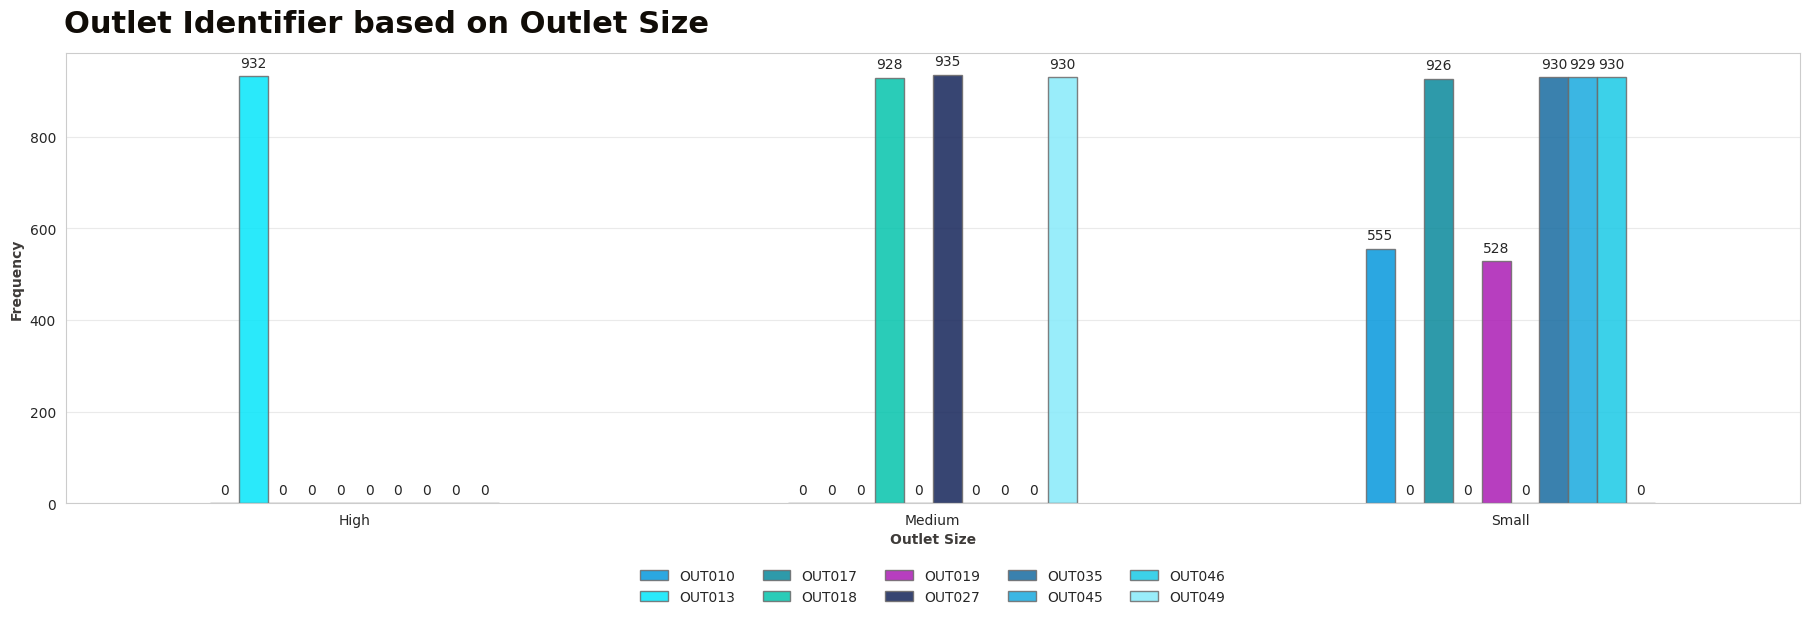

In [ ]:
# --- Labels Settings ---
labels = ['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035', 'OUT045', 'OUT046', 'OUT049']
label_mart = np.array([0, 1, 2])
label_mart2 = ['High', 'Medium', 'Small']

# --- Creating Bar Chart ---
ax = pd.crosstab(ds.Outlet_Size,
                 ds.Outlet_Identifier).plot(kind='bar', figsize=(18, 6), alpha=0.85, edgecolor=black_grad[2],
                                            color=['#0698DC', '#05E6FA', '#09899B', '#04C4AC', '#AB1CB4', '#142459', '#176BA0', '#19AADE', '#1AC9E6', '#87EAFA'])

# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+20, rect.get_height(), horizontalalignment='center',
             fontsize=10)

plt.suptitle('Outlet Identifier based on Outlet Size', fontweight='heavy', x=0.0275, y=1, ha='left', fontsize='22',
             fontfamily='sans-serif', color=black_grad[0])

plt.tight_layout(rect=[0, 0.01, 1, 1.025])
plt.xlabel('Outlet Size', fontfamily='sans-serif', fontweight='bold', color=black_grad[1])
plt.ylabel('Frequency', fontfamily='sans-serif', fontweight='bold', color=black_grad[1])
plt.xticks(label_mart, label_mart2, rotation=0)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5, borderpad=1, frameon=False, fontsize=10)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0);

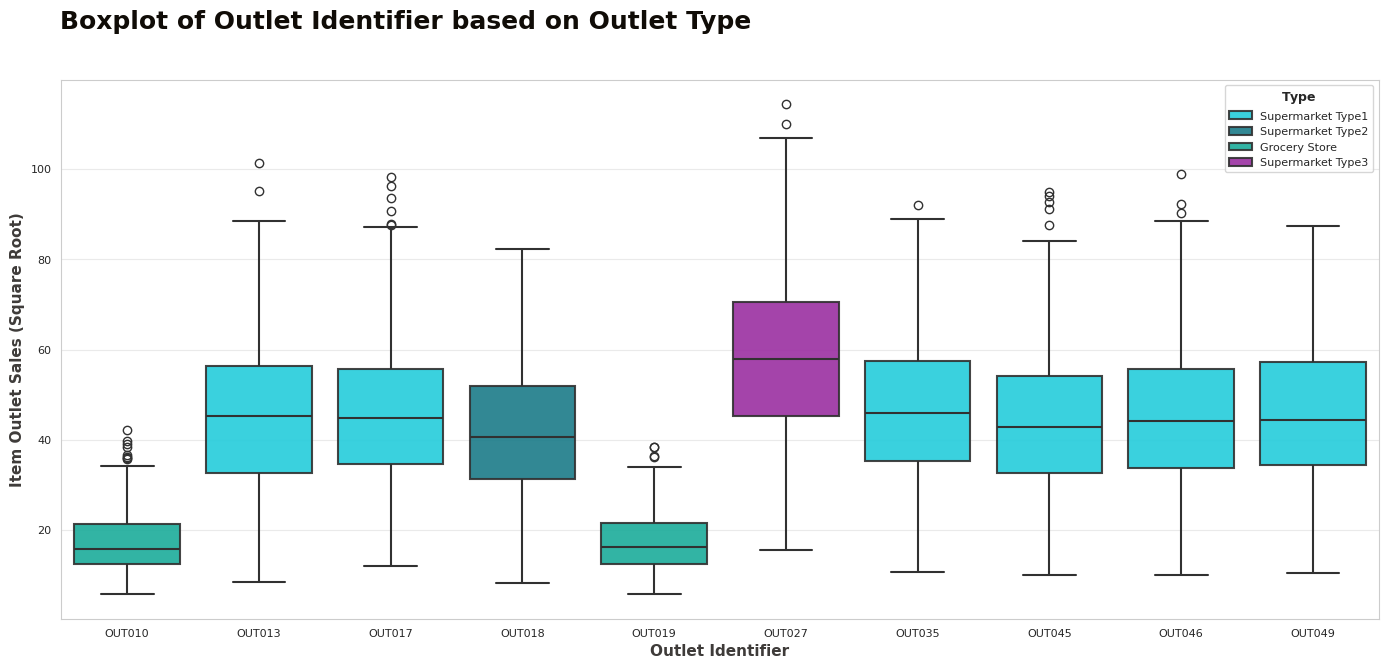

In [ ]:
# Labels Settings
order=['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035', 'OUT045', 'OUT046', 'OUT049']

# Creating Box Plot based on Outlet Type
fig, ax = plt.subplots()
fig.set_size_inches(17, 7)
plt.suptitle('Boxplot of Outlet Identifier based on Outlet Type', fontweight='heavy', x=0.124, y=0.98, ha='left',
             fontsize='18', fontfamily='sans-serif', color=black_grad[0])

sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales_sqrt', hue='Outlet_Type', data=ds, order=order, ax=ax,
            palette=color_mix[1:], boxprops=dict(alpha=0.9), linewidth=1.5)
plt.xlabel('Outlet Identifier', fontweight='bold', fontsize='11', fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Item Outlet Sales (Square Root)', fontweight='bold', fontsize='11', fontfamily='sans-serif',
           color=black_grad[1])
plt.xticks(fontsize='8')
plt.yticks(fontsize='8')
plt.legend(title='$\\bf{Type}$', fontsize='8', title_fontsize='9', loc='upper right', frameon=True)
plt.grid(axis='y', alpha=0.4)
plt.show()